In [2]:
import statsmodels.api as sm
import numpy as np
import scipy.stats as st
import seaborn as sns
from matplotlib import pyplot as plt

## 1 feladat

<Axes: ylabel='Density'>

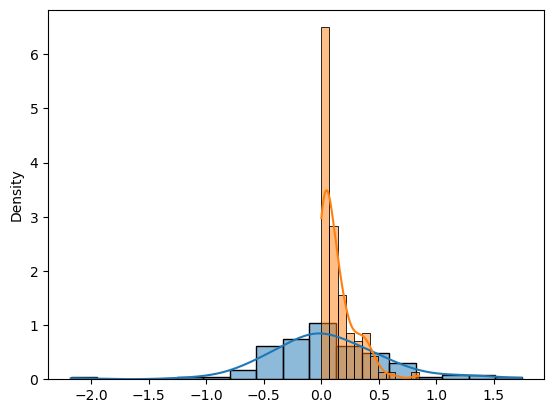

In [3]:


def sim_sqr(m):
    X=np.random.normal(size=m)
    Y=np.random.normal(size=m)
    Y2=Y**2
    
    beta1=np.cov(X,Y2)[0,1]/np.var(X)

    beta0=np.mean(Y2)-beta1*np.mean(X)
    
    r2=np.sum((beta0+beta1*X - np.mean(Y2))**2)/np.sum((Y2 - np.mean(Y2))**2)
    
    return beta0,beta1,r2

b0,b1,R2=sim_sqr(10)

SIM=[sim_sqr(10) for _ in range(100)]

b0= [b[0] for b in SIM]
b1= [b[1] for b in SIM]
R2= [b[2] for b in SIM]


sns.histplot(b1, kde=True, stat="density")
sns.histplot(R2, kde=True, stat="density")

# A tanult elmélet alapján mit tudunk mondani $\beta_x$ és az $R^2$ eloszlásáról?
# Válasz: Betax és r^2 0 körül konvergál viszont a véletlennek hála néha nem így van. Az eloszlás haranggörbe alakú.

## 2 feladat

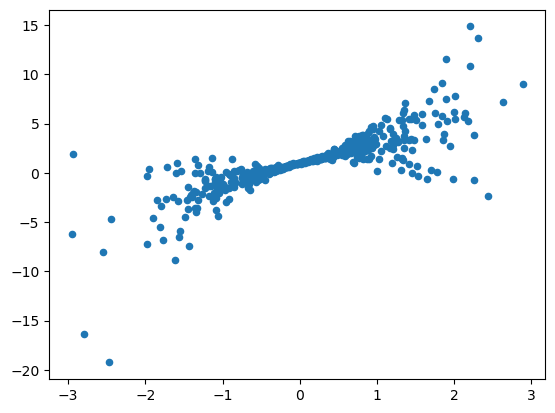

In [41]:
def generate_data(m, alpha):
    X=np.random.normal(size=m)
    Y=2*X+1+np.random.normal(0,0.04+alpha*X**2)
    return X,Y

X, Y = generate_data(500, 1)

plt.scatter(X, Y, s=20)
#Az $\alpha$ paraméter mely értéke(i) mellett tesz eleget a folyamat a homoszkedaszticitás feltételének és miért?
#Válasz:Alpha=0 esetén nem homoszkedasztikus mert 0 val szorozva eltűnik az X tag így az error fuggetlen lesz X től.